# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [72]:
m=2
run = 1

1

Choose your grid

In [73]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

global source=false

false

In [74]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [75]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [76]:
print(N)

400.0

In [77]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [78]:
using Printf
include("./TMYangMillsTHREE.jl");

In [79]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.00125


# Initial data of m β Ψ and Ψ,x

In [80]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.00886#0.08865958683658391#0.0884375
r0=0.25
sigma=0.05

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [81]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [82]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×3 Matrix{Float64}:
 0.0          0.0           0.0
 2.83141e-27  8.40997e-25   5.06607e-16
 1.44103e-26  2.64155e-24   1.67158e-15
 5.74464e-26  7.40502e-24   4.11883e-15
 2.11694e-25  2.08719e-23   8.99614e-15
 7.44616e-25  5.93455e-23   1.83692e-14
 2.5258e-24   1.68841e-22   3.59066e-14
 8.30652e-24  4.77788e-22   6.80428e-14
 2.65851e-23  1.34062e-21   1.25941e-13
 8.30548e-23  3.72472e-21   2.28782e-13
 2.53896e-22  1.02418e-20   4.09222e-13
 7.60984e-22  2.7869e-20    7.22409e-13
 2.23987e-21  7.50516e-20   1.26074e-12
 ⋮                         
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-18
 0.00170572   0.00643151   -2.97517e-

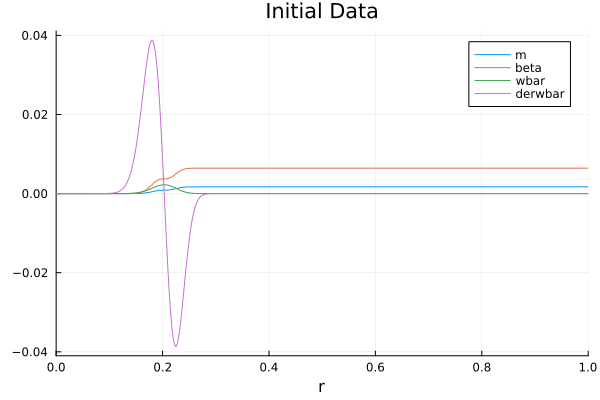

In [83]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [84]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [85]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [86]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [87]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.40200752507836


In [88]:
using Base.Threads
Threads.nthreads()

4

In [89]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.0102888910927433

In [90]:
dt=0.002/2^(m-1)

0.001

 ## Time evolution

fixed grid

In [91]:
finaltime=1.25
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.001, t=0.010000000000000002 speed is 0.49750312500000005, dx/dt=2.5


iteration 20 dt is 0.001, t=0.02000000000000001 speed is 0.49750312500000005, dx/dt=2.5


iteration 30 dt is 0.001, t=0.03000000000000002 speed is 0.49750312500000005, dx/dt=2.5


iteration 40 dt is 0.001, t=0.04000000000000003 speed is 0.49750312500000005, dx/dt=2.5


iteration 50 dt is 0.001, t=0.05000000000000004 speed is 0.49750312500000005, dx/dt=2.5


iteration 60 dt is 0.001, t=0.060000000000000046 speed is 0.49750312500000005, dx/dt=2.5


iteration 70 dt is 0.001, t=0.07000000000000005 speed is 0.49750312500000005, dx/dt=2.5


iteration 80 dt is 0.001, t=0.08000000000000006 speed is 0.49750312500000005, dx/dt=2.5


iteration 90 dt is 0.001, t=0.09000000000000007 speed is 0.49750312500000005, dx/dt=2.5


iteration 100 dt is 0.001, t=0.10000000000000007 speed is 0.49750312500000005, dx/dt=2.5


iteration 110 dt is 0.001, t=0.11000000000000008 speed is 0.4975031250000001, dx/dt=2.5


itera



iteration 930 dt is 0.001, t=0.9300000000000007 speed is 0.4975031249999475, dx/dt=2.5


iteration 940 dt is 0.001, t=0.9400000000000007 speed is 0.49750312499995597, dx/dt=2.5


iteration 950 dt is 0.001, t=0.9500000000000007 speed is 0.49750312499996296, dx/dt=2.5


iteration 960 dt is 0.001, t=0.9600000000000007 speed is 0.4975031249999689, dx/dt=2.5


iteration 970 dt is 0.001, t=0.9700000000000008 speed is 0.49750312499997384, dx/dt=2.5


iteration 980 dt is 0.001, t=0.9800000000000008 speed is 0.49750312499997784, dx/dt=2.5


iteration 990 dt is 0.001, t=0.9900000000000008 speed is 0.49750312499998117, dx/dt=2.5


iteration 1000 dt is 0.001, t=1.0000000000000007 speed is 0.49750312499998406, dx/dt=2.5


iteration 1010 dt is 0.001, t=1.0099999999999996 speed is 0.4975031249999864, dx/dt=2.5


iteration 1020 dt is 0.001, t=1.0199999999999985 speed is 0.49750312499998833, dx/dt=2.5


iteration 1030 dt is 0.001, t=1.0299999999999974 speed is 0.4975031249999901, dx/dt=2.5


iteratio